Esta imagen es de tipo: <class 'numpy.ndarray'> con dimensiones: (1600, 1200, 3)


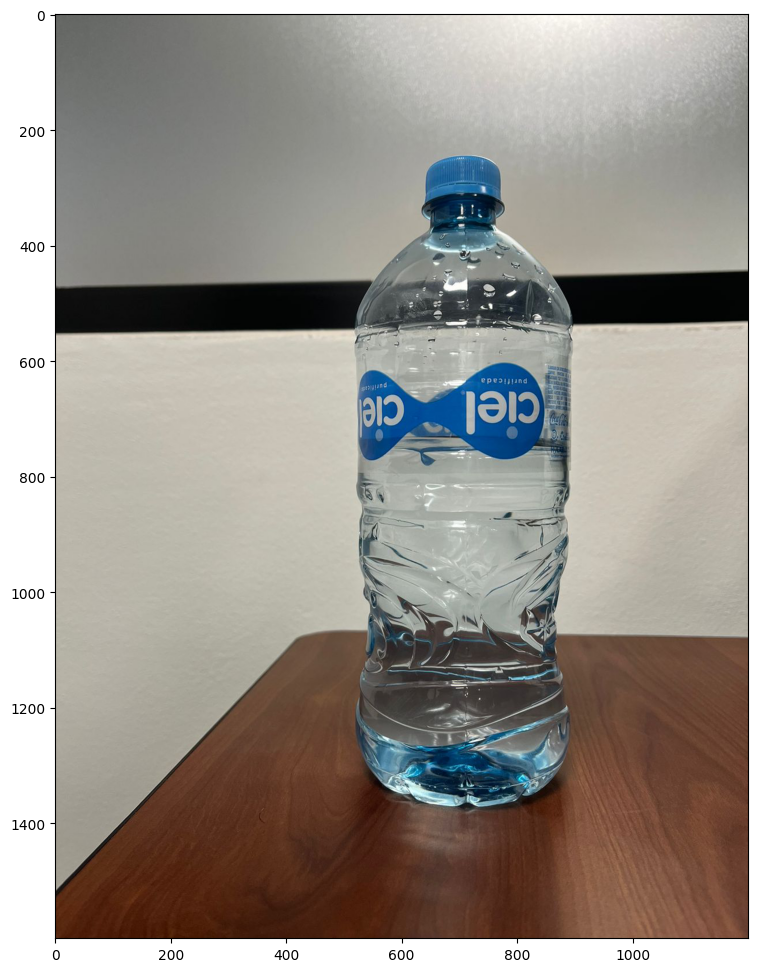

In [6]:
# paquetes necesarios
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.stats import multivariate_normal
%matplotlib inline
#Leer La imagen 
lenna_sp = mpimg.imread('/content/sample_data/botella.jpeg')
# Desplegar información y graficar la imagen
print('Esta imagen es de tipo:', type (lenna_sp), 'con dimensiones:', lenna_sp.shape)
plt.figure (figsize=(12,12))
plt.imshow(lenna_sp, cmap= 'gray')

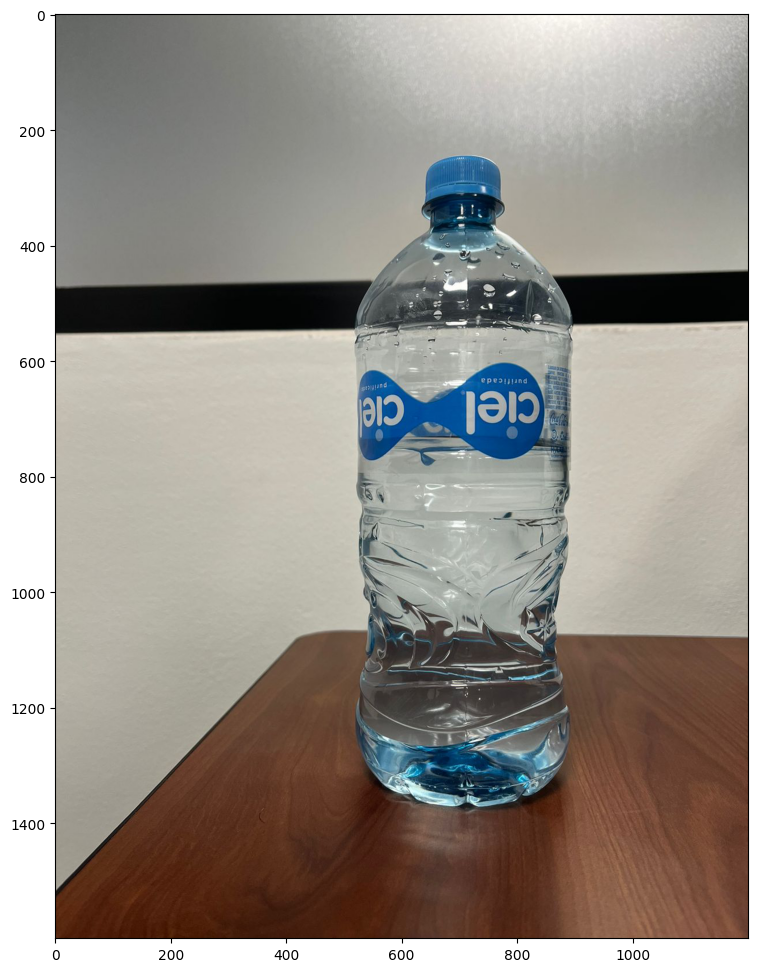

In [18]:
# Ahora mostraremos una imagen con ruido gaussiano
lenna_gn = mpimg.imread('/content/sample_data/botella.jpeg')
plt.figure(figsize=(12,12))
plt.imshow (lenna_gn, cmap = 'gray')

[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00

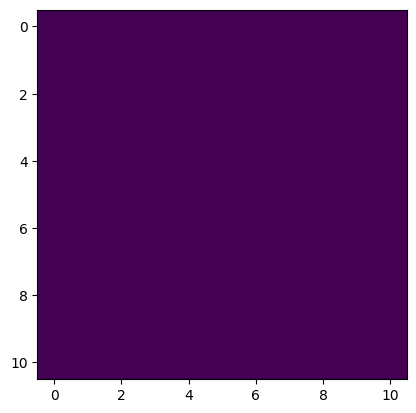

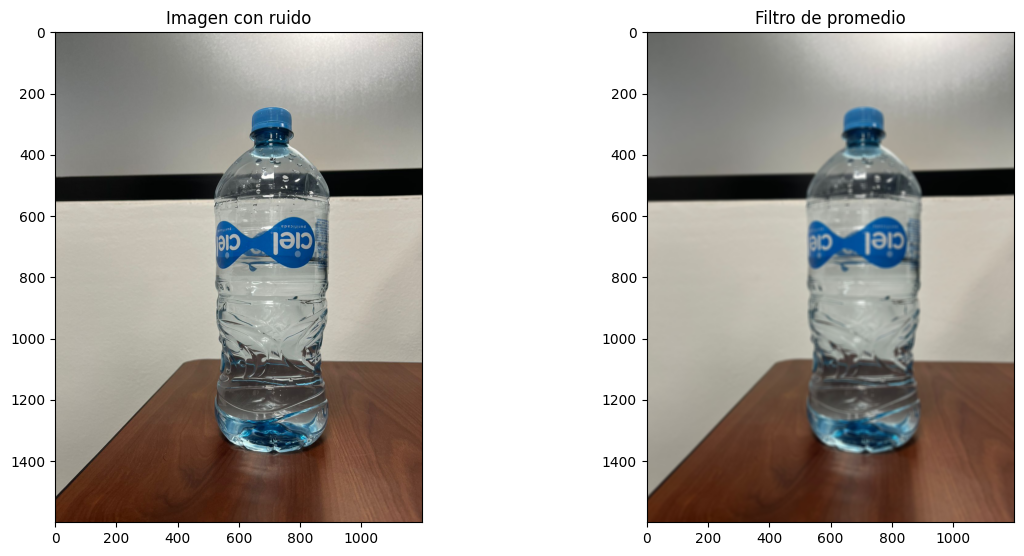

In [19]:
# Definir kernel (filtro)
k = 5
tamano =2 *k + 1
# RESOLVER
kernel = np.ones ((tamano, tamano), np. float32) / (tamano**2)
print (kernel)
#imprimir el filtro
plt.imshow(kernel)
plt.show()
# RESOLVER
# Operación de convolución 2D entre el filtro y la imagen
# TIP: usa la función filter 2D de OpenCV
img_filtrada = cv2.filter2D (lenna_gn, -1, kernel)
# plot with various axes scales
plt.figure (figsize=(14, 14))
plt.subplot (221)
plt.imshow(lenna_gn, cmap = 'gray')
plt.title('Imagen con ruido')
plt.subplot (222)
plt.imshow(img_filtrada, cmap = 'gray')
plt.title('Filtro de promedio')
plt.show()

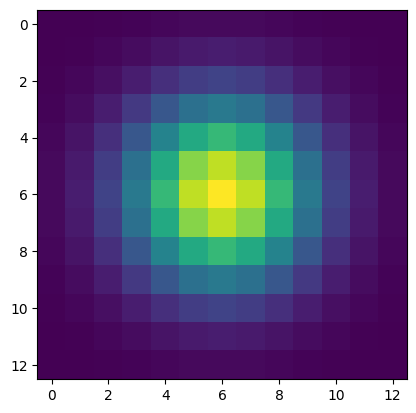

In [15]:
# Ejercicio
# 2. Genera un kernel gaussiano
# 3. Modifica los valores del filtro y observa Los resultados
#definir el tamaño del nuevo filtro
k = 6
tamano = 2 * k + 1

# RESOLVER: Definir los parámetros de la función gaussiana
mean = [0, 0]
cov = [[5,0], [0,5]]
# Ahora rellenamos el kernel
kernel_gaussiano = np.zeros((tamano, tamano), np.float32)
for i in range (tamano):
  for j in range (tamano):
    x = [-k + i, -k + j]
    w = multivariate_normal.pdf (x, mean, cov)
    kernel_gaussiano[i][j] = w
#imprimimos el kernel
plt.imshow(kernel_gaussiano)
plt.show()

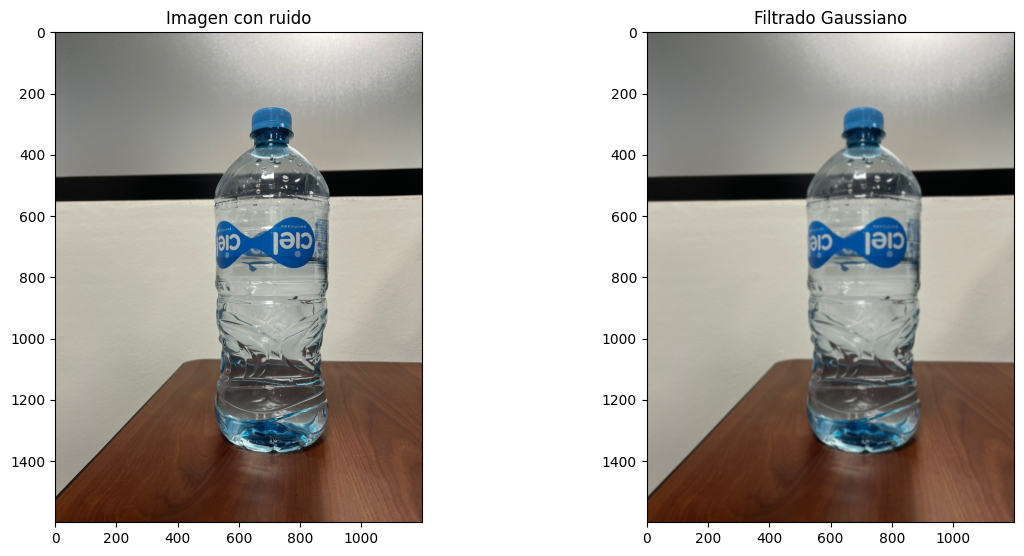

In [20]:
# RESOLVER: implementa el filtrado gaussiano
# Operación de convolución 2D entre el kernel que generamos y La imagen objetivo
img_difuminada = cv2.filter2D (lenna_gn, -1, kernel_gaussiano)
# plot with various Ixes axes scales
plt.figure(figsize=(14, 14))
plt.subplot (221)
plt.imshow (lenna_gn, cmap = 'gray')
plt.title('Imagen con ruido')
plt.subplot (222)
plt.imshow(img_difuminada, cmap = 'gray')
plt.title('Filtrado Gaussiano')
plt.show()

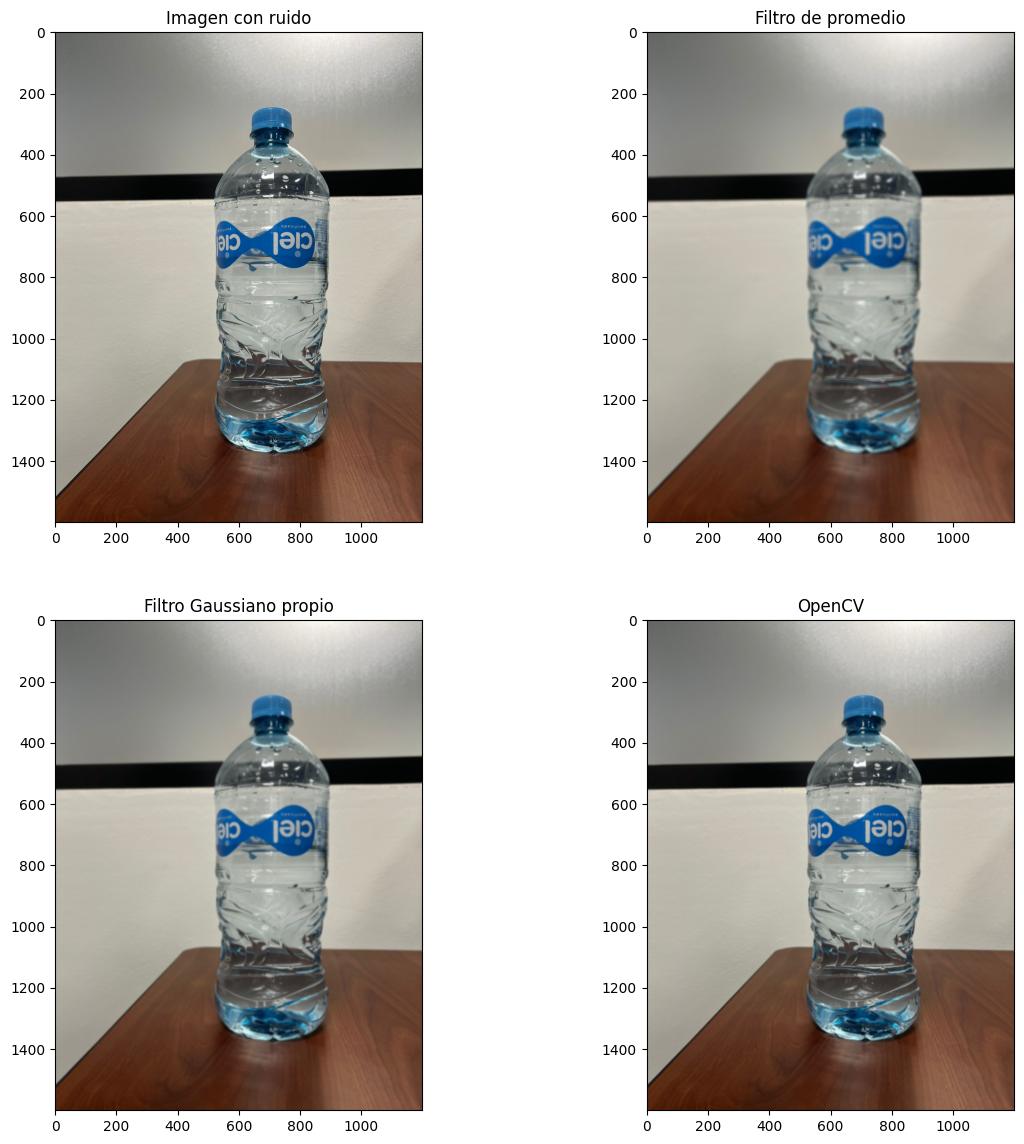

In [21]:
#OpenCV ya tiene implementado un filtro gaussiano
# Comparemos resultados
sigma = 5
size = 5
blur= cv2.GaussianBlur (lenna_gn, (5,5), sigma)
# plot with various axes scales
plt.figure (figsize=(14, 14))
plt.subplot (221)
plt.imshow (lenna_gn, cmap = 'gray')
plt.title('Imagen con ruido')
plt.subplot (222)
plt.imshow(img_filtrada, cmap = 'gray')
plt.title('Filtro de promedio')
plt.subplot (223)
plt.imshow(img_difuminada, cmap = 'gray')
plt.title('Filtro Gaussiano propio')
plt.subplot (224)
plt.imshow (blur, cmap = 'gray')
plt.title('OpenCV')
plt.show()